# Project :- Exploratory Data Analysis (EDA) on Retail Sales Data

Data Loading and Inspection:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [3]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [4]:
df.shape

(1000, 9)

In [5]:
df.duplicated().sum()

0

In [6]:
df=df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Descriptive Statistics

In [8]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [9]:
for i in df.columns.to_list():
    print(f'No of unique values in {i} => {df[i].nunique()}.')

No of unique values in Transaction ID => 1000.
No of unique values in Date => 345.
No of unique values in Customer ID => 1000.
No of unique values in Gender => 2.
No of unique values in Age => 47.
No of unique values in Product Category => 3.
No of unique values in Quantity => 4.
No of unique values in Price per Unit => 5.
No of unique values in Total Amount => 18.


In [10]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

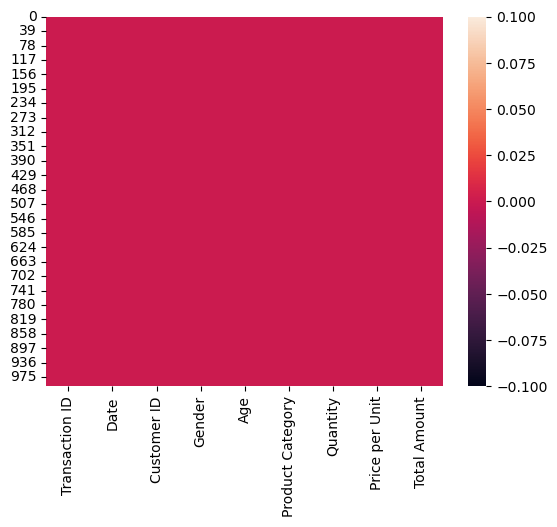

In [11]:
sns.heatmap(df.isna());

In [12]:
df["Total Amount"].value_counts()

Total Amount
50      115
100     108
900      62
200      62
1200     54
30       51
500      51
25       51
1500     50
1000     49
2000     49
300      46
60       45
90       44
120      43
75       43
150      42
600      35
Name: count, dtype: int64

Customer Behaviour

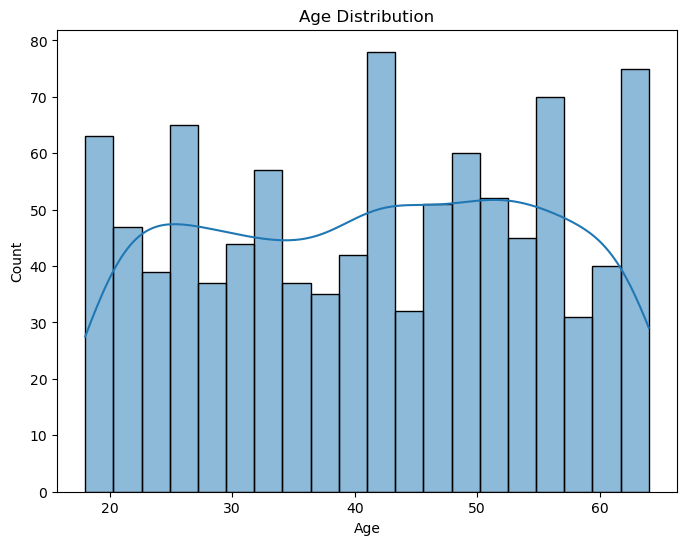

In [13]:
# Demographic Analysis
# Visualize age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



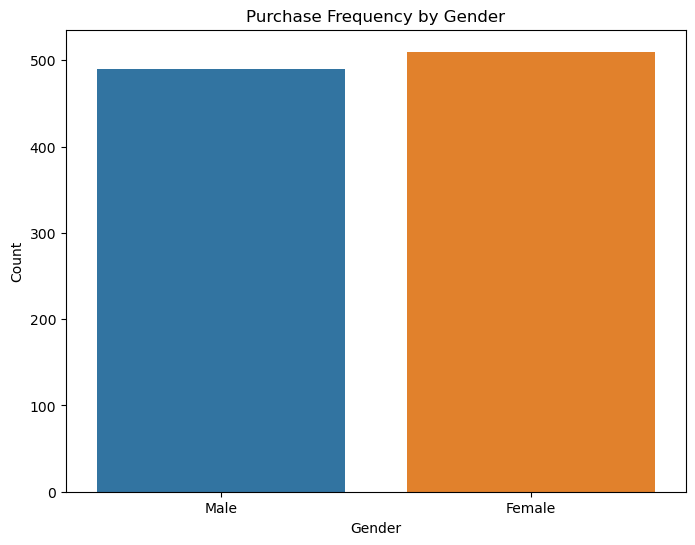

In [14]:
# Purchasing Behavior Analysis
# Visualize purchase frequency by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Purchase Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [15]:
# Statistical Analysis
# Example: Compute correlation between age and purchase amount
correlation = df['Age'].corr(df['Total Amount'])
print("Correlation between Age and Total Amount:", correlation)

Correlation between Age and Total Amount: -0.060568023883045684


In [16]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Set 'Date' column as index
df.set_index('Date', inplace=True)

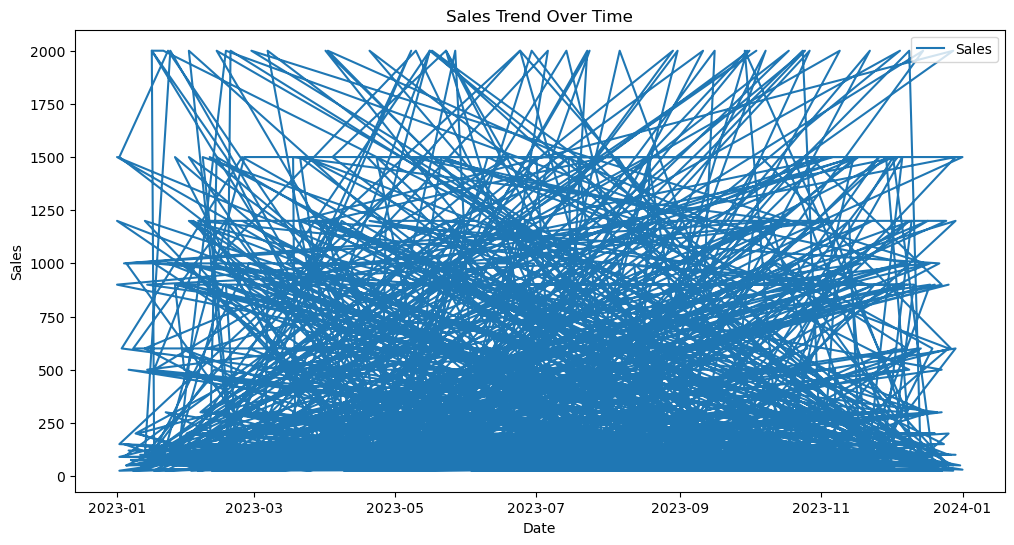

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total Amount'], label='Sales')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [18]:
# Calculate summary statistics
summary_stats = df['Total Amount'].describe()
print(summary_stats)

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: Total Amount, dtype: float64


In [19]:
df.rename(columns={'Date': 'Month'}, inplace=True)

In [20]:
monthly_sales = df.groupby('Date')['Total Amount'].sum()

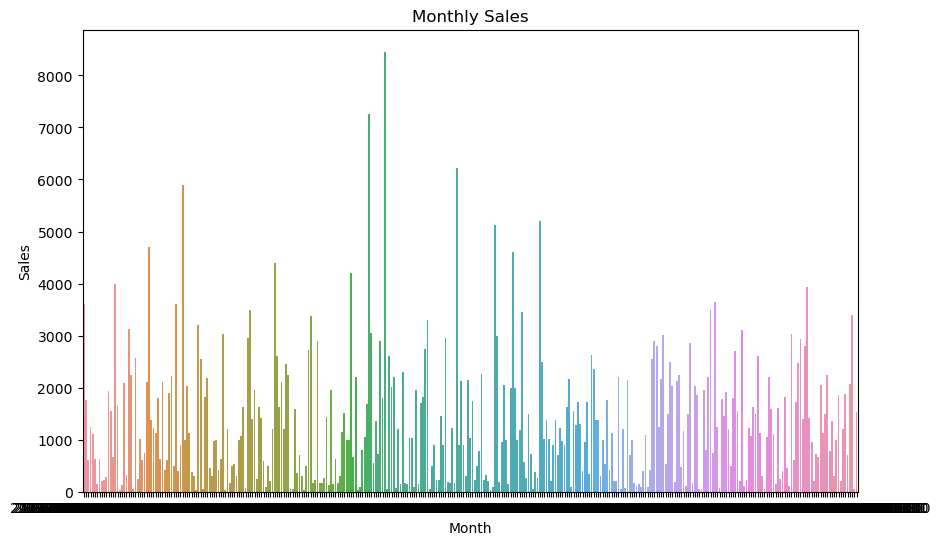

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

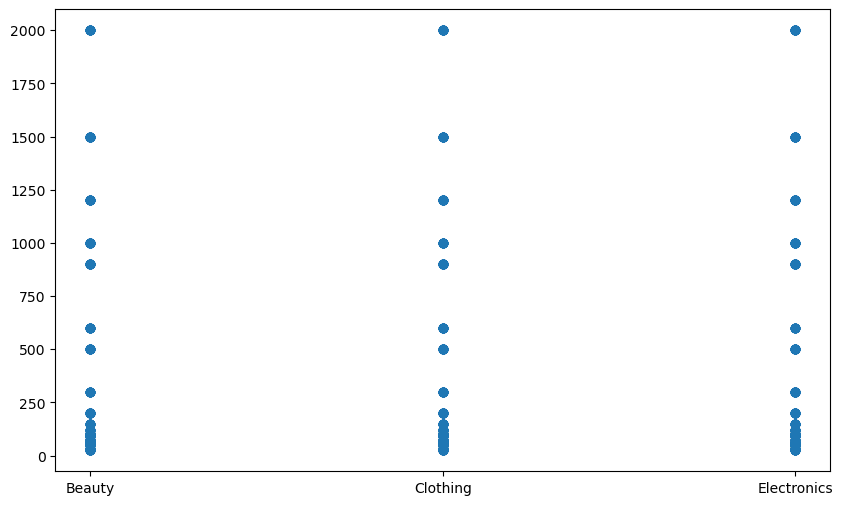

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.scatter(x = df["Product Category"] , y = df["Total Amount"])
plt.show()

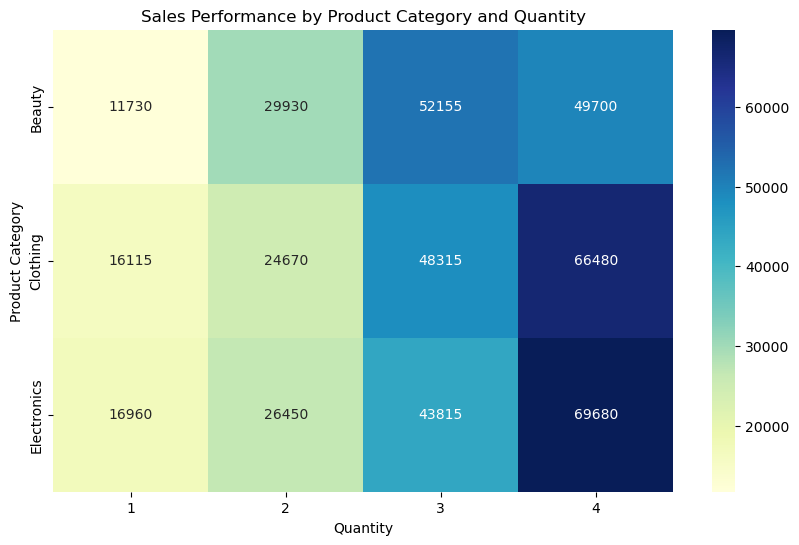

In [23]:
# Heatmap: Sales Performance by Product Category and Region
sales_pivot = df.pivot_table(index='Product Category', columns='Quantity', values='Total Amount', aggfunc=sum)
plt.figure(figsize=(10, 6))
sns.heatmap(sales_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Sales Performance by Product Category and Quantity')
plt.xlabel('Quantity')
plt.ylabel('Product Category')
plt.show()

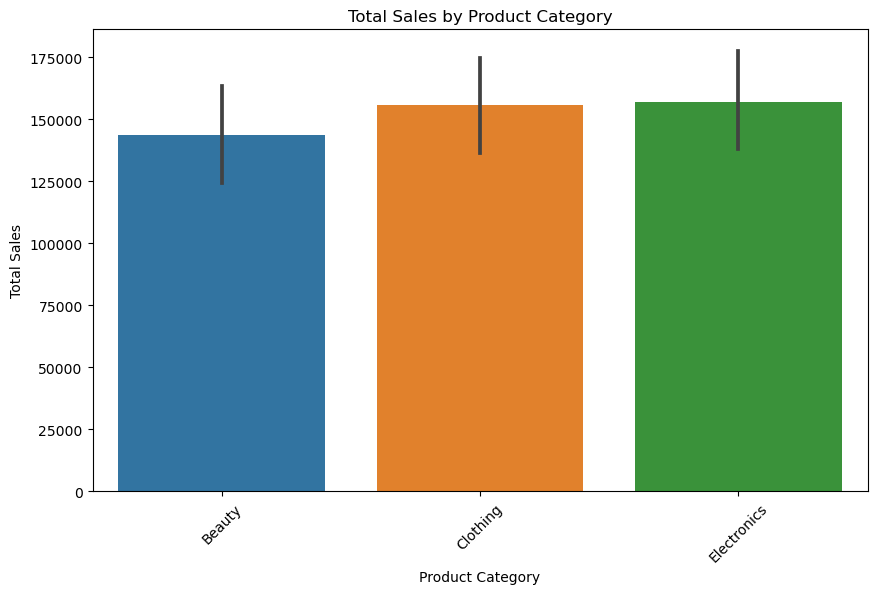

In [24]:
# Bar Chart: Sales by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Amount', data=df, estimator=sum)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [25]:
data= df.groupby(['Date','Total Amount'])['Price per Unit'].nunique()

<Axes: xlabel='Product Category', ylabel='Total Amount'>

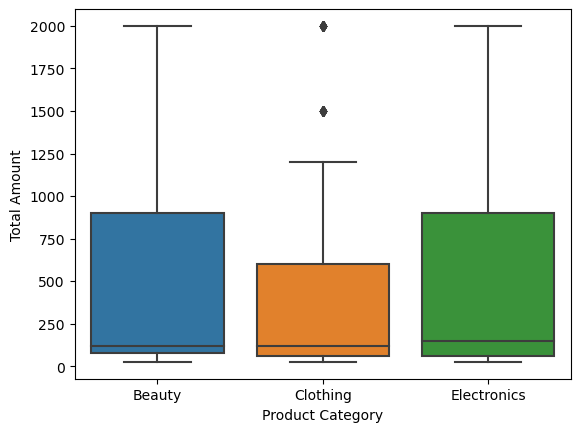

In [26]:
sns.boxplot(x=df['Product Category'], y=df['Total Amount'])

<Axes: xlabel='Gender', ylabel='Total Amount'>

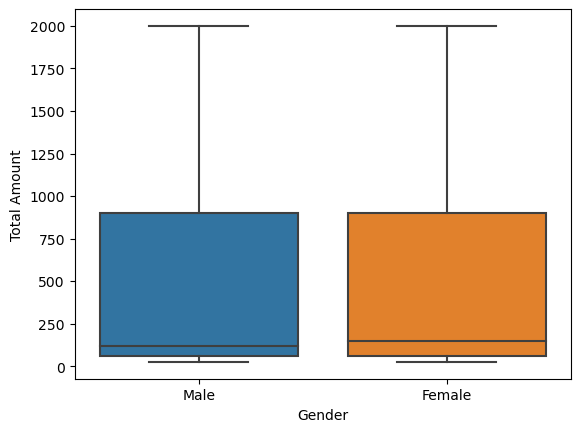

In [27]:
sns.boxplot(x=df['Gender'], y=df['Total Amount'])

In [28]:
print(data.head())

Date        Total Amount
2023-01-01  900             1
            1200            1
            1500            1
2023-01-02  25              1
            90              1
Name: Price per Unit, dtype: int64


In [29]:
print(df.head())

            Transaction ID Customer ID  Gender  Age Product Category  \
Date                                                                   
2023-11-24               1     CUST001    Male   34           Beauty   
2023-02-27               2     CUST002  Female   26         Clothing   
2023-01-13               3     CUST003    Male   50      Electronics   
2023-05-21               4     CUST004    Male   37         Clothing   
2023-05-06               5     CUST005    Male   30           Beauty   

            Quantity  Price per Unit  Total Amount  
Date                                                
2023-11-24         3              50           150  
2023-02-27         2             500          1000  
2023-01-13         1              30            30  
2023-05-21         1             500           500  
2023-05-06         2              50           100  


Distribution of Numerical variables about Mean and Median

C:\Users\User\AppData\Local\Temp\ipykernel_6724\3717929511.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='blue')


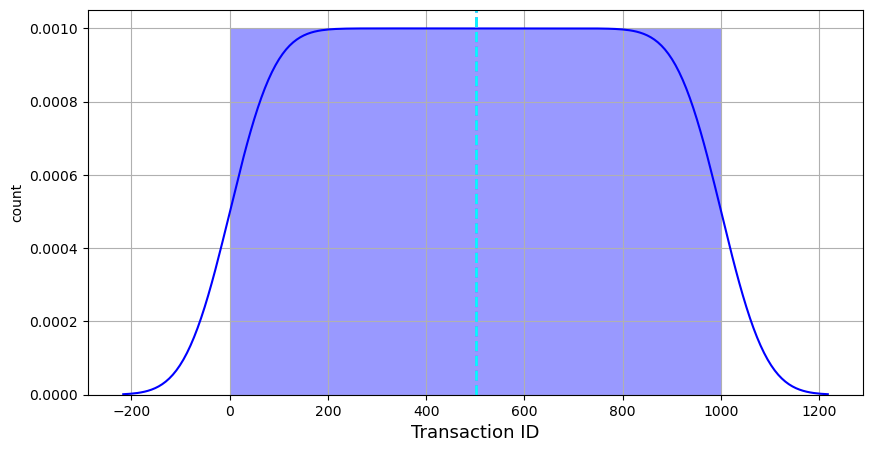

C:\Users\User\AppData\Local\Temp\ipykernel_6724\3717929511.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='blue')


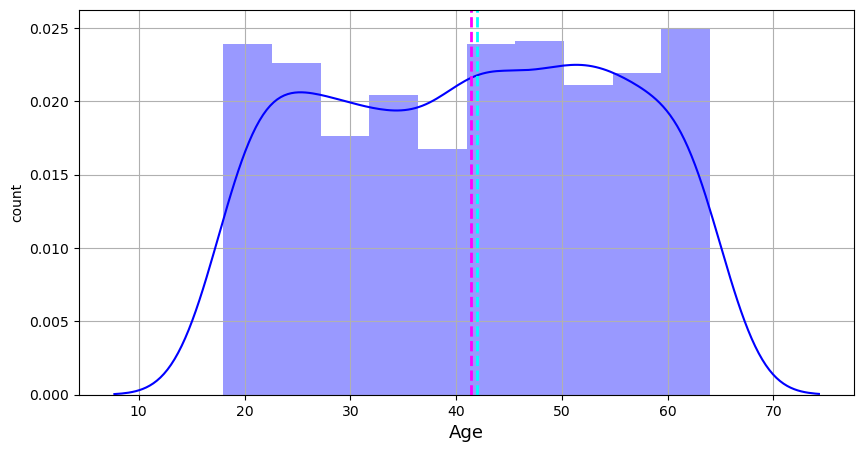

C:\Users\User\AppData\Local\Temp\ipykernel_6724\3717929511.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='blue')


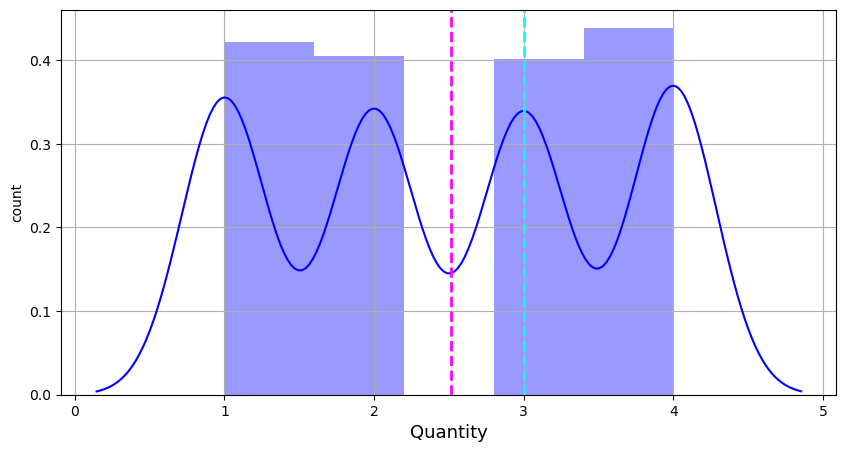

C:\Users\User\AppData\Local\Temp\ipykernel_6724\3717929511.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='blue')


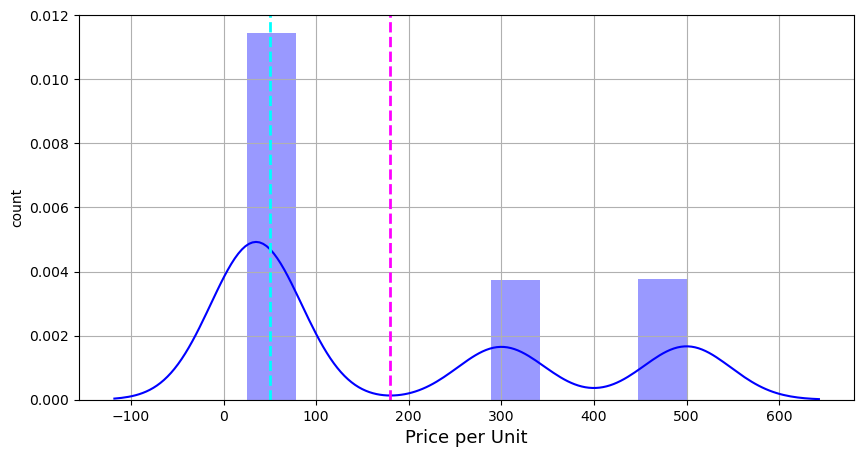

C:\Users\User\AppData\Local\Temp\ipykernel_6724\3717929511.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='blue')


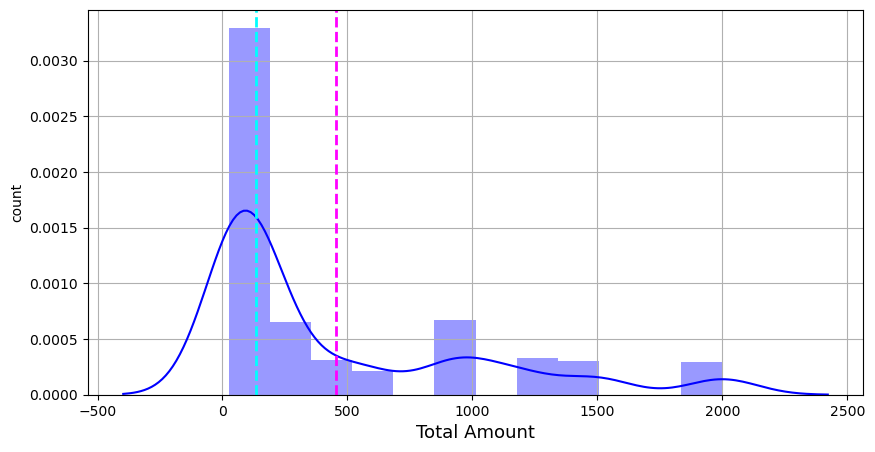

In [30]:
for col in df.select_dtypes('int').columns:
    plt.figure(figsize=(10, 5))
    sns.distplot(df[col], color='blue')
    
    plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth = 2)
    plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth = 2)
    plt.xlabel(col, fontsize=13)
    plt.ylabel('count')
    plt.grid()
    plt.show()   

In [31]:
df1 = df.copy()

In [32]:
df1.head()

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Date,,,,,,,,
2023-11-24,1,CUST001,Male,34,Beauty,3,50,150
2023-02-27,2,CUST002,Female,26,Clothing,2,500,1000
2023-01-13,3,CUST003,Male,50,Electronics,1,30,30
2023-05-21,4,CUST004,Male,37,Clothing,1,500,500
2023-05-06,5,CUST005,Male,30,Beauty,2,50,100


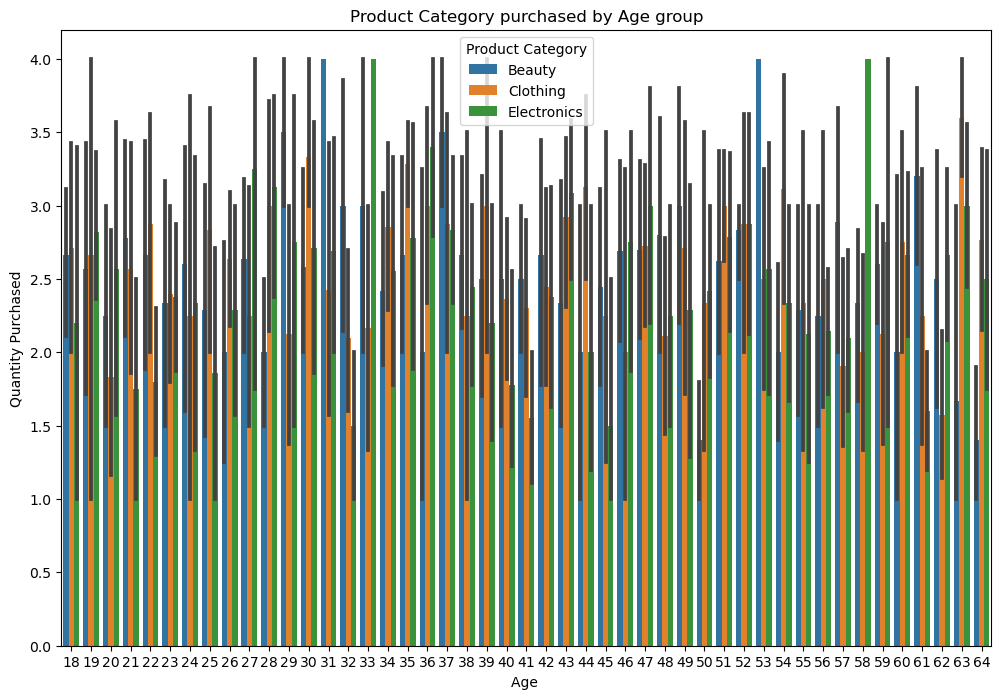

In [35]:
plt.figure(figsize=(12,8))
sns.barplot(x='Age', y='Quantity', hue='Product Category', data= df1)
plt.title('Product Category purchased by Age group')
plt.xlabel('Age ')
plt.ylabel('Quantity Purchased')
plt.show()

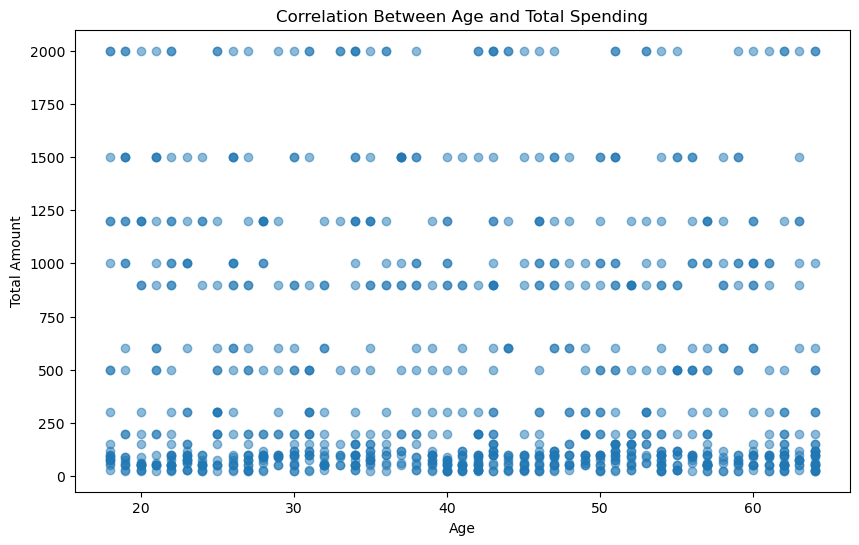

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'],df['Total Amount'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.title('Correlation Between Age and Total Spending')
plt.show()

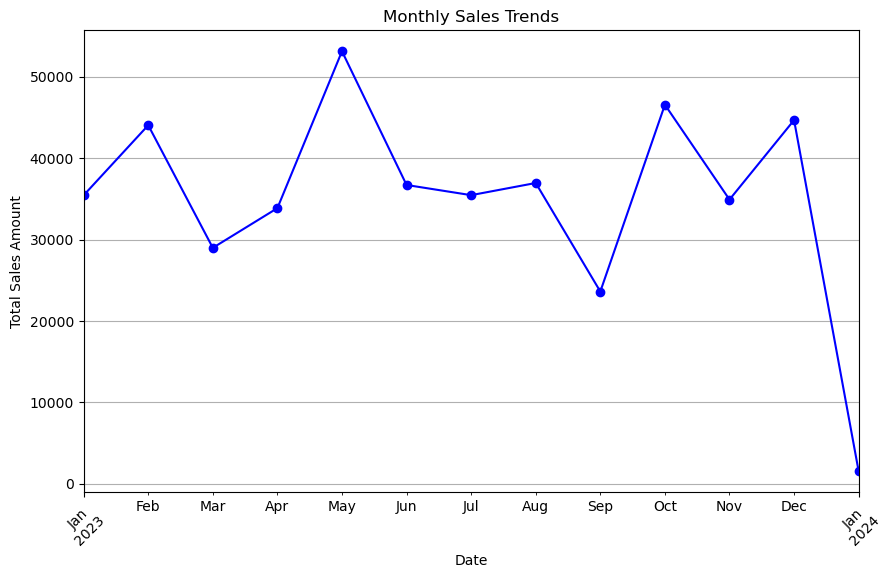

In [33]:
monthly_sales = df['Total Amount'].resample('M').sum()

# Plot the sales trends over time
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', color='b', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()